<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/FAMA_FRENCH_5_Factor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [569]:
!pip3 install yfinance  --quiet
!pip3 install quantstats --quiet
# !pip3 install janitor --quiet

In [570]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import quantstats as qs
qs.extend_pandas()

In [571]:
plt.rcParams['figure.figsize']=(15,9)

In [572]:
ticker= 'ADANIPORTS.NS'
start= '2016-01-01'
end= '2021-03-31'

# Basic INFO/ DATA ANALYSIS

In [573]:
reliance=yf.download(tickers=ticker,start=start,end=end,progress=False)
returns=reliance['Adj Close'].pct_change()
reliance.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



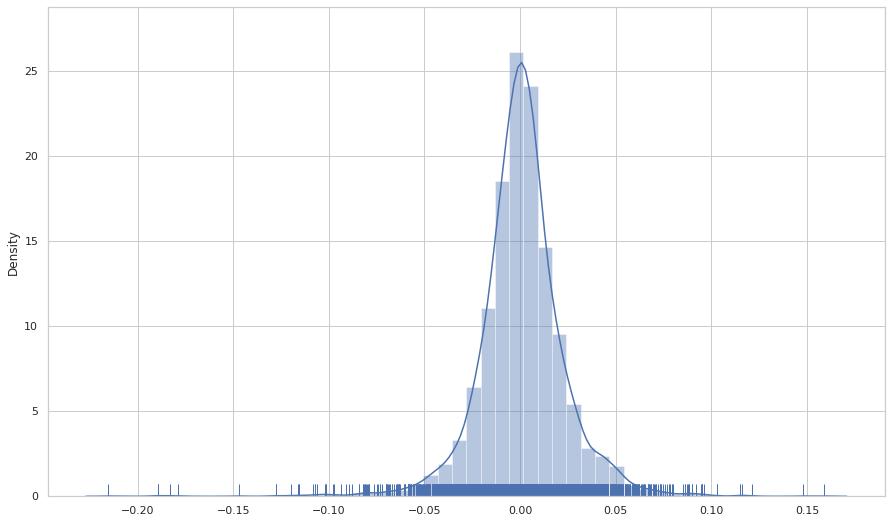

In [574]:
sns.distplot(reliance[['Open', 'High', 'Low', 'Close', 'Adj Close']].pct_change().dropna(),rug=True)

In [575]:
qs.reports.metrics(returns,mode='full')

                           Strategy
-------------------------  ----------
Start Period               2016-01-01
End Period                 2021-03-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          172.12%
CAGR﹪                     21.02%

Sharpe                     0.72
Smart Sharpe               0.69
Sortino                    1.04
Smart Sortino              1.0
Sortino/√2                 0.74
Smart Sortino/√2           0.7
Omega                      1.14

Max Drawdown               -52.92%
Longest DD Days            1044
Volatility (ann.)          36.53%
Calmar                     0.4
Skew                       -0.41
Kurtosis                   6.86

Expected Daily %           0.08%
Expected Monthly %         1.6%
Expected Yearly %          18.16%
Kelly Criterion            6.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.68%
Expected Shortfall (cVaR)  -3.68%

Gain/Pain Ratio            0.14
Gain/Pain (1M)             0

In [576]:
qs.stats.drawdown_details(returns)

,start,valley,end,days,max drawdown,99% max drawdown
0,2016-01-01,2016-05-04,2016-08-31,243,-11.571117,-6.720254
1,2016-09-01,2017-05-23,2017-06-29,301,-6.432497,-5.239860
2,2017-06-30,2018-03-07,2018-11-27,515,-6.983335,-4.608882
3,2018-11-28,2018-12-10,2018-12-24,26,-3.829160,-3.745158
4,2018-12-26,2019-01-28,2019-06-13,169,-12.772500,-3.178236
5,2019-06-14,2019-06-19,2019-07-04,20,-3.251063,-2.036400
6,2019-07-05,2019-07-05,2019-07-10,5,-3.000706,-1.155435
7,2019-07-11,2019-10-23,2020-02-26,230,-5.858586,-4.408351
8,2020-02-27,2020-03-23,2020-04-03,36,-18.954757,-10.165527
9,2020-04-07,2020-05-04,2020-08-18,133,-8.186834,-5.157644


In [577]:
qs.stats.distribution(returns)

{'Daily': {'outliers': [0.06178745271342767,
   -0.05776255621312021,
   -0.07887622866211141,
   -0.047096536680574785,
   0.07357489998832745,
   0.048129867145386473,
   0.060643710050242605,
   0.051855574760642176,
   0.05751582767936325,
   -0.06720253671290322,
   0.044698021476262007,
   0.053033619527275366,
   -0.11571116878995702,
   -0.04921973729754536,
   -0.06359162815018926,
   0.05282339104163114,
   0.05022936856272975,
   0.07799810414147035,
   0.05924486958539865,
   -0.044820098308999023,
   -0.05239859782733802,
   -0.04886356296147831,
   0.06480567149479799,
   0.05025774742691147,
   0.0950463231621077,
   -0.06043119391615237,
   0.04583498297749666,
   0.049629442253058986,
   0.05700922139922415,
   0.04691609659835616,
   -0.052108454433876794,
   -0.06432497341537602,
   -0.05804597871986439,
   -0.04608881586473701,
   -0.06983335368726984,
   0.04740919610290373,
   -0.06304274266579823,
   -0.04395300880912956,
   -0.04809965603391808,
   0.04731406676

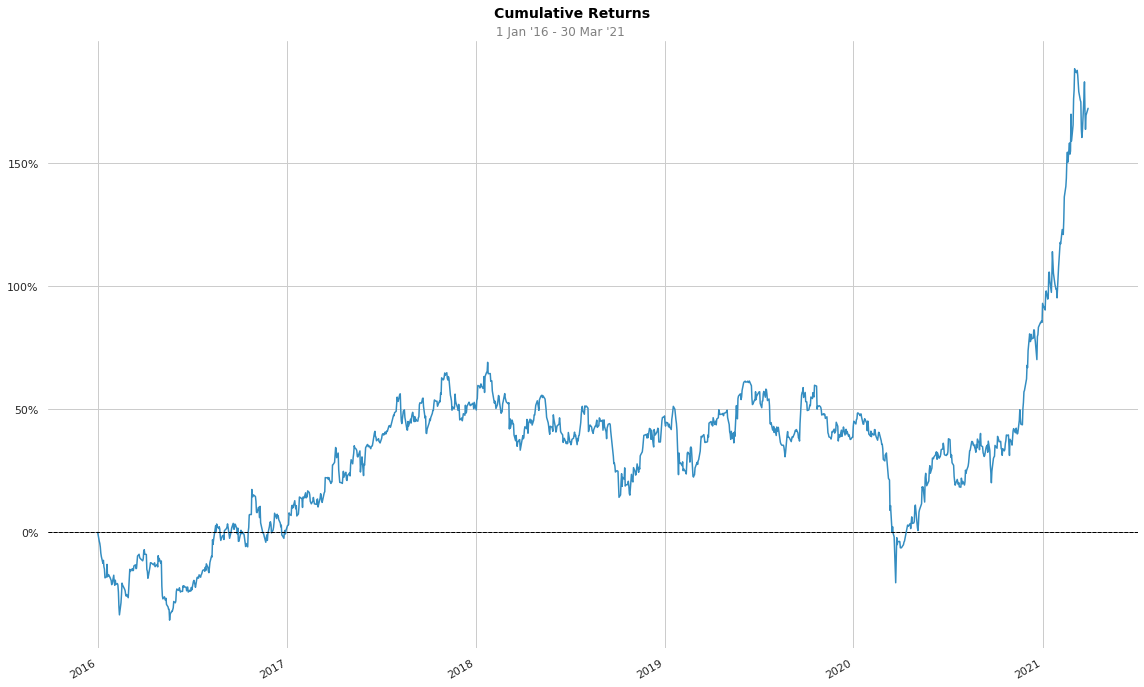

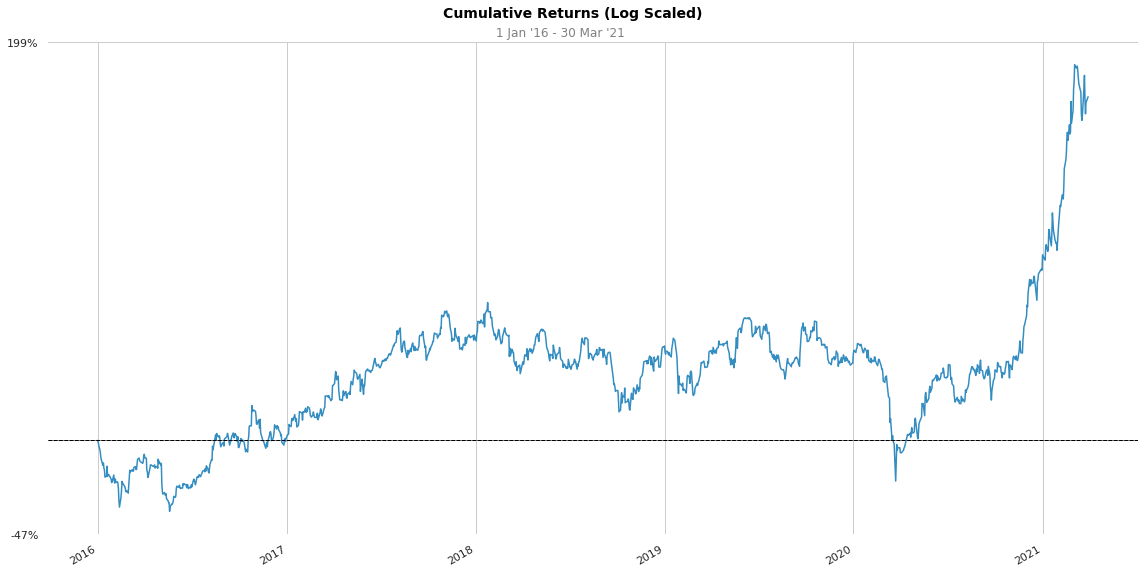

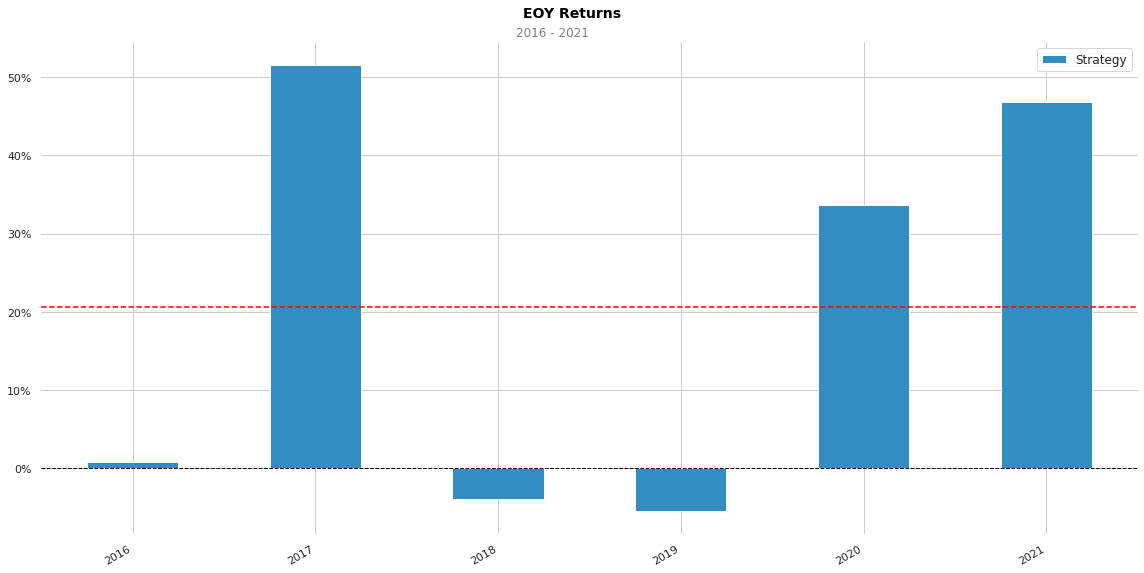

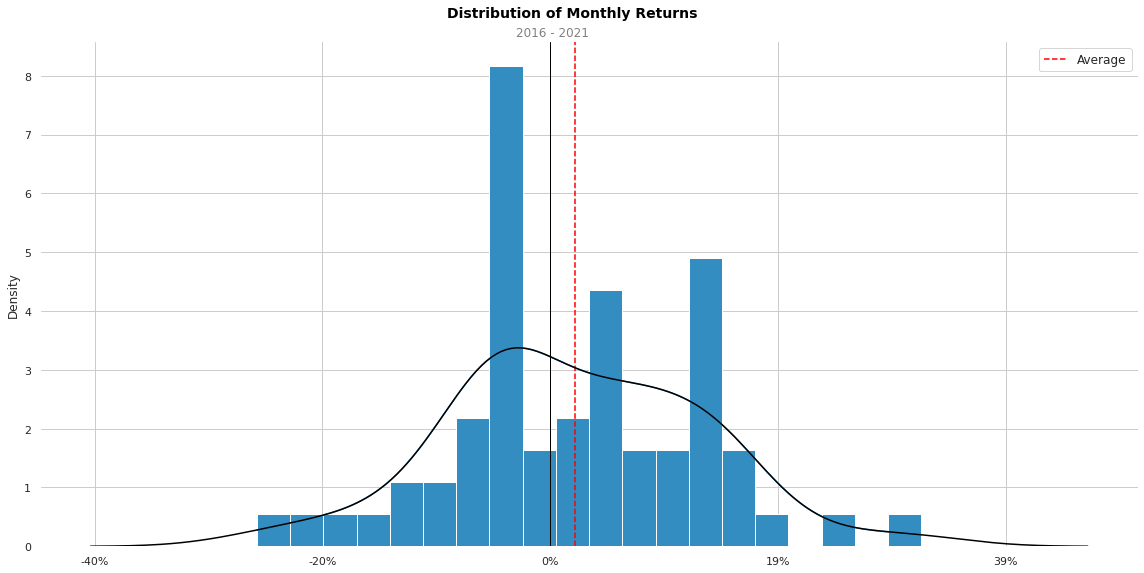

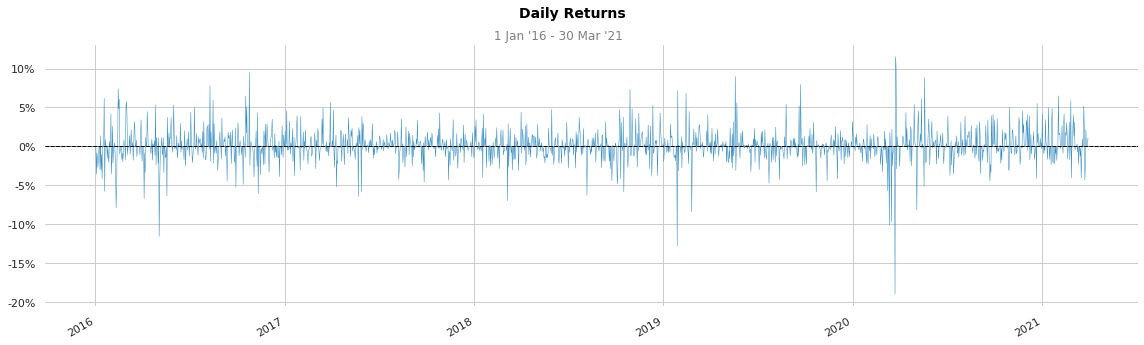

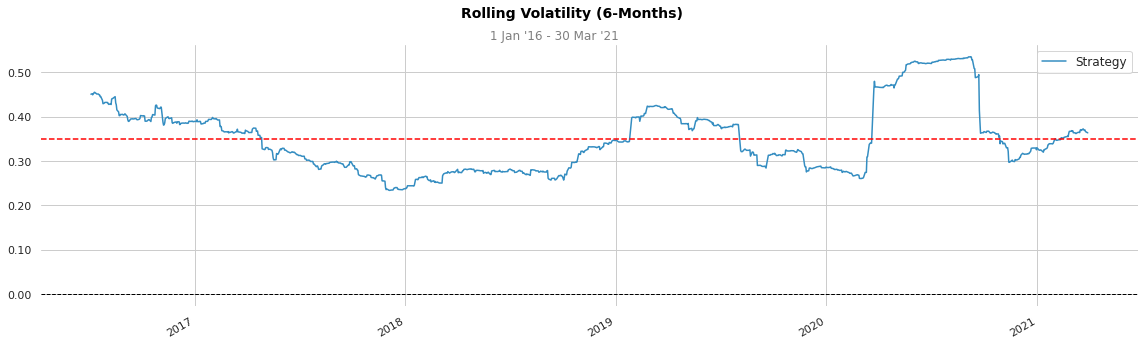

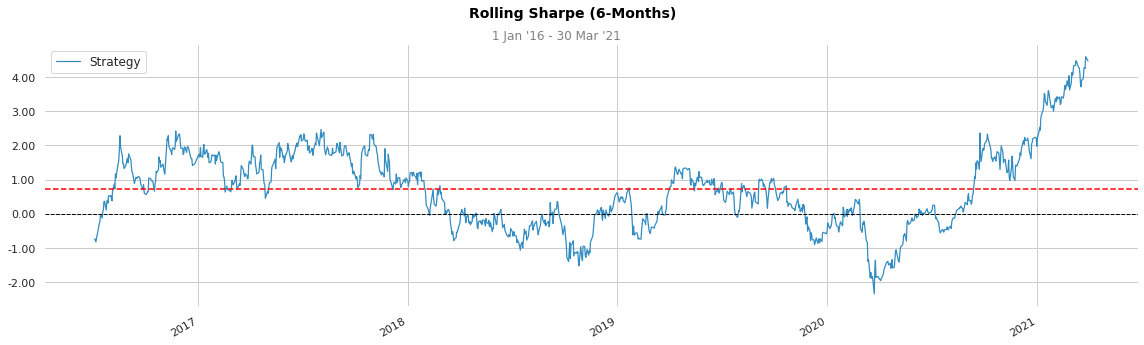

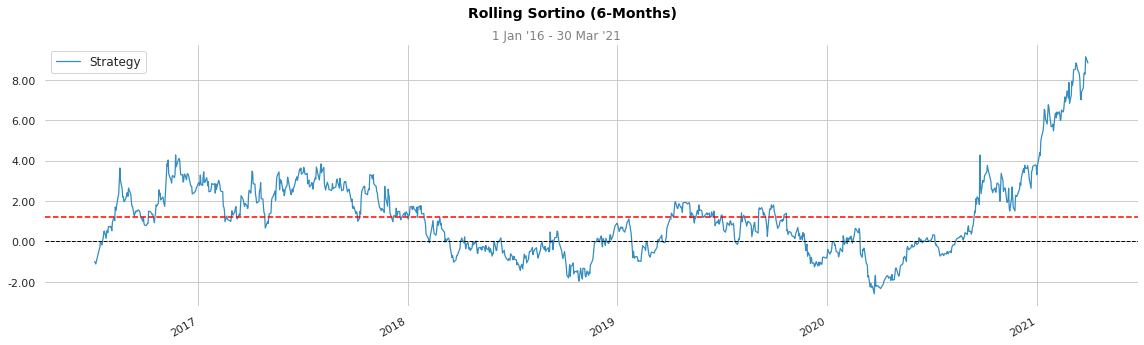

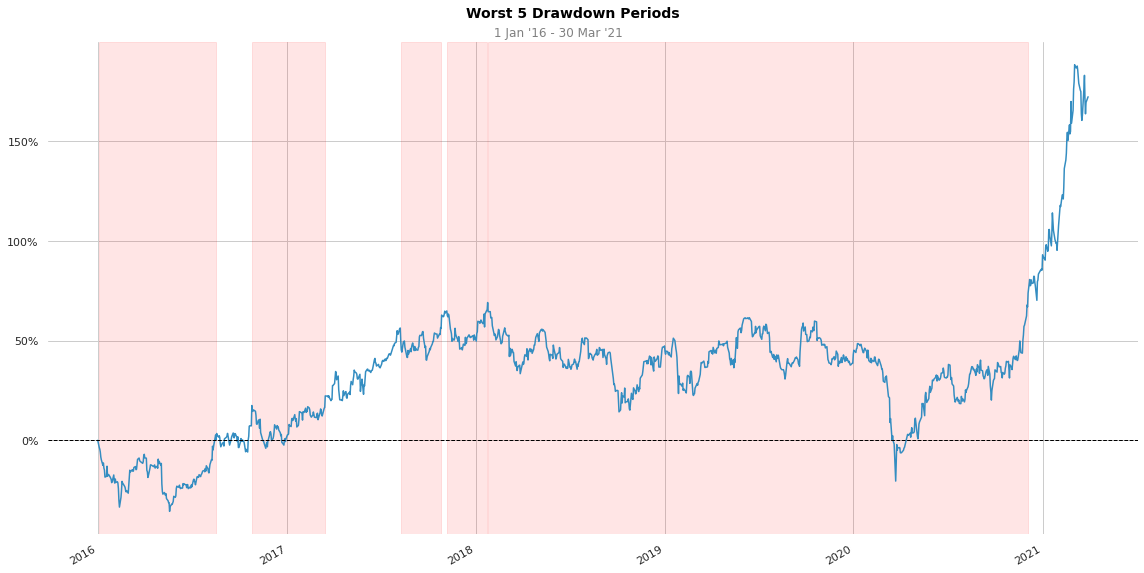

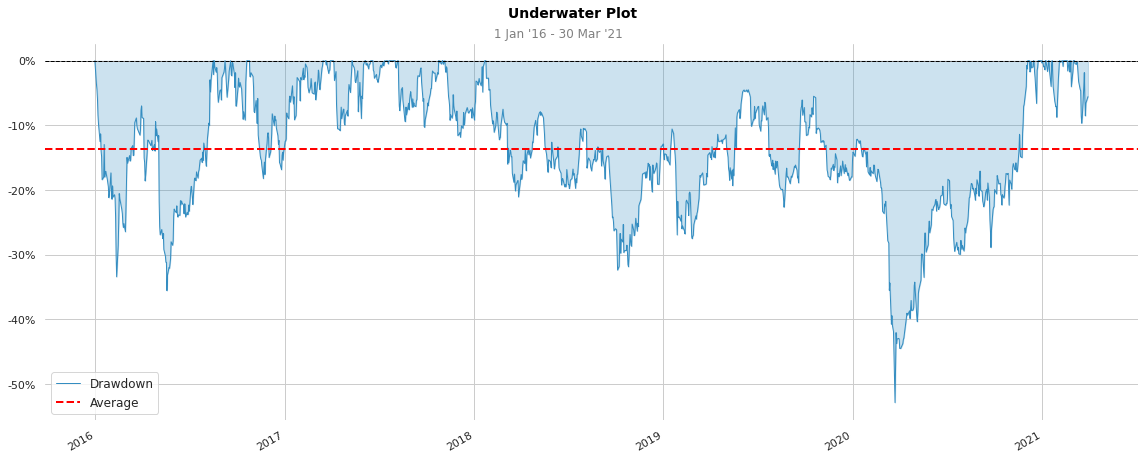

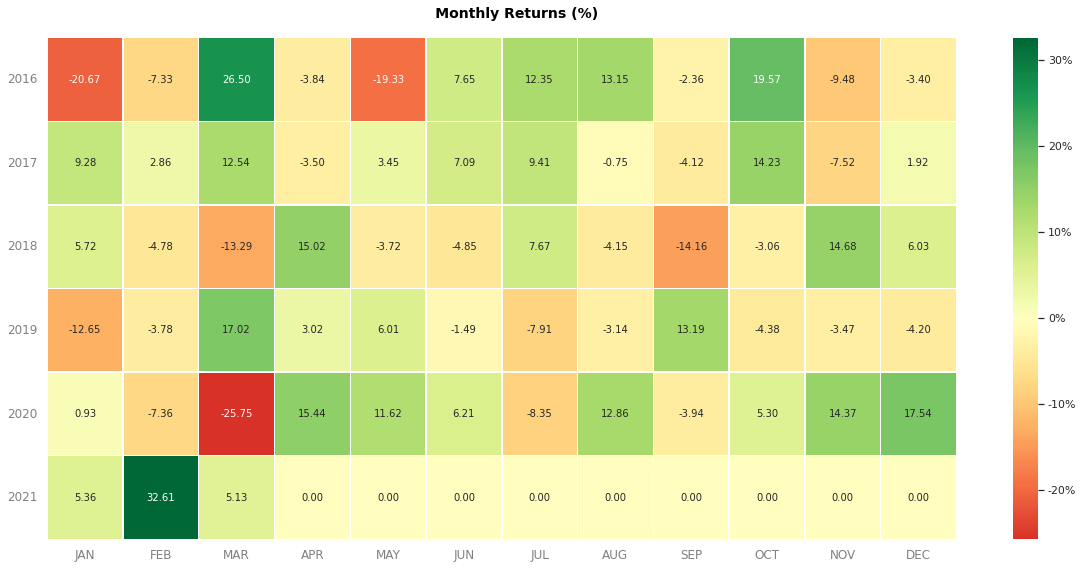

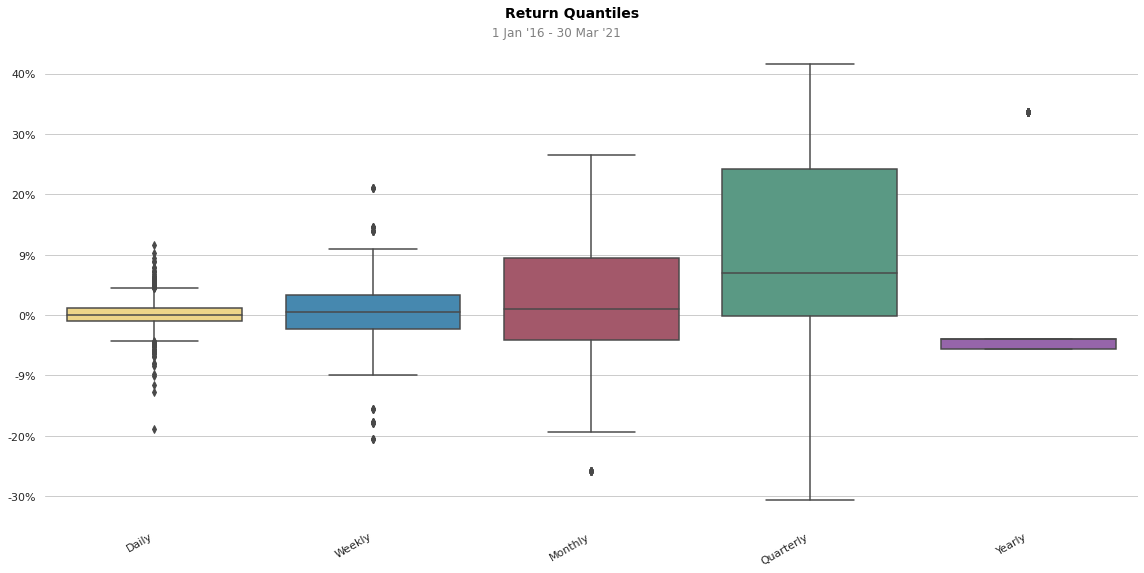

In [578]:
qs.reports.plots(returns,figsize=(16,8),mode='full')

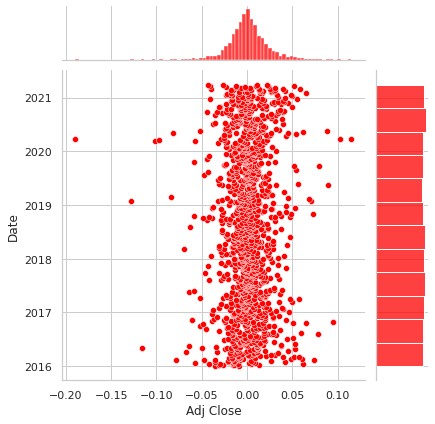

In [579]:
sns.jointplot(x=returns,y=returns.index,color='red')

In [580]:
y=pd.DataFrame(returns[(returns.index >= '2019') & (returns.index < '2021')]).index
x=pd.DataFrame(returns[(returns.index >= '2019') & (returns.index < '2021')])
# sns.jointplot(x=x,y=y,color='orange')


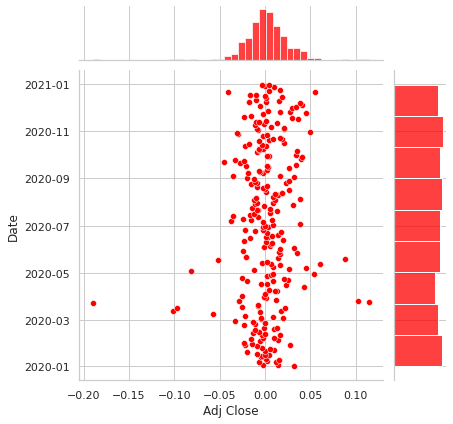

In [581]:
sns.jointplot(x=(returns[(returns.index >= '2020') & (returns.index < '2021')]),
              y=(returns[(returns.index >= '2020') & (returns.index < '2021')]).index
,color='red')

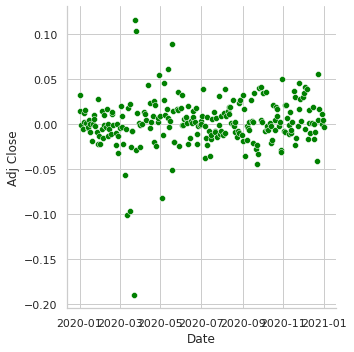

In [582]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(
    data=(returns[(returns.index >= '2020') & (returns.index < '2021')]),
    palette=cmap, color='green')


---
Factor Modeling  ' `5 FACTOR MODEL` '
---

In [583]:
# https://faculty.iima.ac.in/~iffm/Indian-Fama-French-Momentum/index.php

In [584]:
fama_french_data=pd.read_csv('/content/2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv')
fama_french_data.set_index(fama_french_data.Date,inplace=True,drop=True)
fama_french_data.drop(['Date'], axis = 1,inplace=True)
fama_french_data.tail

<bound method NDFrame.tail of                  SMB       HML       WML        MF        RF
Date                                                        
1993-10-01  1.540483  1.479874 -0.411557 -0.793569  0.036221
1993-10-04  0.462659  0.430060 -0.663439 -0.961768  0.036221
1993-10-05 -0.006558  0.930126 -0.826086 -0.316715  0.035038
1993-10-06 -0.067096 -1.604942  0.178143 -0.341461  0.035038
1993-10-07 -0.279363  0.205212 -0.024128  0.372488  0.035038
...              ...       ...       ...       ...       ...
2021-03-24  0.520055 -0.932689 -0.866157 -1.449862  0.013377
2021-03-25 -0.510397  0.450892 -0.449168 -2.069615  0.013377
2021-03-26 -1.069193  0.953888  0.494804  1.214963  0.013537
2021-03-30 -1.092616 -0.189975  0.178261  1.780477  0.013537
2021-03-31  0.235451 -0.472631  0.310435  0.051996  0.013537

[6825 rows x 5 columns]>

In [585]:
fama_data=(fama_french_data[(fama_french_data.index >= '2016-01-01') & (fama_french_data.index < '2021-03-31')])
fama_data

,SMB,HML,WML,MF,RF
Date,,,,,
2016-01-01,0.565846,1.693102,-0.140734,0.394685,0.028142
2016-01-04,1.004216,0.223940,0.187259,-1.466450,0.028142
2016-01-05,0.025855,3.104191,0.165442,0.440278,0.028142
2016-01-06,0.445456,-0.714121,0.447218,-0.457800,0.028142
2016-01-07,-0.158435,-2.843858,0.675656,-2.587282,0.028142
...,...,...,...,...,...
2021-03-23,0.964094,-1.330151,0.815025,0.631062,0.013377
2021-03-24,0.520055,-0.932689,-0.866157,-1.449862,0.013377
2021-03-25,-0.510397,0.450892,-0.449168,-2.069615,0.013377


In [586]:
final_data=fama_data.join(other=returns)

In [587]:
final_data.rename(columns={'Adj Close':'Rel_Ret'},inplace=True)

In [588]:
final_data.columns

Index(['SMB', 'HML', 'WML', 'MF', 'RF', 'Rel_Ret'], dtype='object')

In [589]:
column_names = ['Rel_Ret' ,'RF', 'SMB', 'HML', 'WML', 'MF']
final_data = final_data.reindex(columns=column_names)
final_data.dropna(inplace=True)
final_data=round(final_data,6)
final_data

,Rel_Ret,RF,SMB,HML,WML,MF
Date,,,,,,
2016-01-04,-0.035881,0.028142,1.004216,0.223940,0.187259,-1.466450
2016-01-05,-0.008723,0.028142,0.025855,3.104191,0.165442,0.440278
2016-01-06,-0.015252,0.028142,0.445456,-0.714121,0.447218,-0.457800
2016-01-07,-0.027006,0.028142,-0.158435,-2.843858,0.675656,-2.587282
2016-01-08,-0.014694,0.028142,0.688444,1.111711,-0.279746,0.831344
...,...,...,...,...,...,...
2021-03-23,0.023064,0.013377,0.964094,-1.330151,0.815025,0.631062
2021-03-24,-0.042922,0.013377,0.520055,-0.932689,-0.866157,-1.449862
2021-03-25,-0.026314,0.013377,-0.510397,0.450892,-0.449168,-2.069615


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



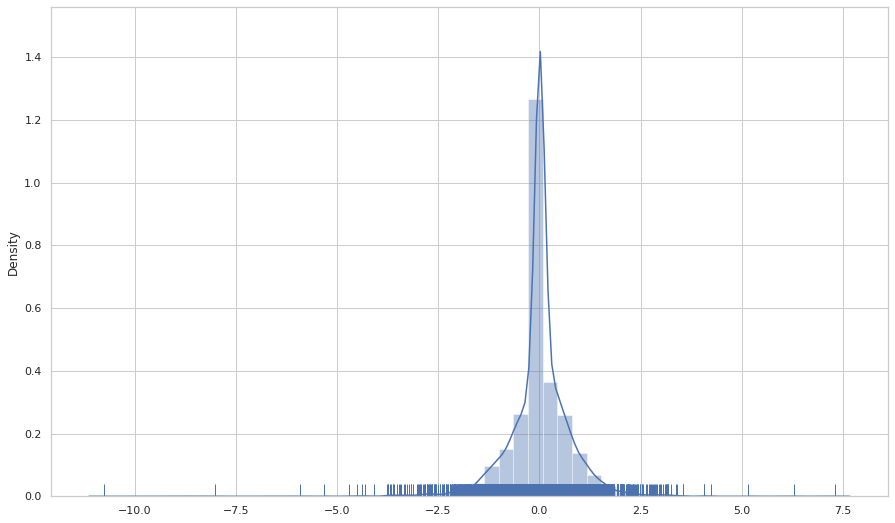

In [590]:
sns.distplot(final_data,rug=True)

In [591]:
final_data=final_data.resample(rule='M') \
.last()

In [592]:
# final_data.loc[:,final_data.columns!= 'Rel_Ret'].index

final_data.loc[:,final_data.columns == 'Rel_Ret']

,Rel_Ret
Date,
2016-01-31,0.006640
2016-02-29,-0.016992
2016-03-31,0.007115
2016-04-30,0.011680
2016-05-31,0.009987
...,...
2020-11-30,0.003413
2020-12-31,-0.003399
2021-01-31,-0.018108


In [593]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS


In [594]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rel_Ret   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     7.529
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.75e-05
Time:                        16:37:15   Log-Likelihood:                 182.01
No. Observations:                  63   AIC:                            -352.0
Df Residuals:                      57   BIC:                            -339.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.009      0.414      0.680      -0.014       0.021
RF            -0.1712      0.382     -0.448      0.656      -0.937       0.594
SMB           -0.0013      0.002     -0.705      0.483      -0.005       0.002
HML           -0.0077      0.002     -3.098      0.003      -0.013      -0.003
WML           -0.0043      0.002     -1.720      0.091      -0.009       0.001
MF             0.0095      0.002      5.209      0.000       0.006       0.013
==============================================================================
Omnibus:                        6.155   Durbin-Watson:                   2.480
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.509
Skew:                           0.536   Prob(JB):                       0.0637
Kurtosis:                       3.973   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""